In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
import missingno as msno

In [ ]:
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [ ]:
patient_time = pd.read_csv("/content/Time.csv", encoding="utf-8")
patient_timeage = pd.read_csv("/content/TimeAge.csv", encoding="utf-8")
patient_info = pd.read_csv("/content/PatientInfo.csv", encoding="utf-8")

In [ ]:
column_name = ["date", "confirmed", "deceased"]

In [ ]:
patient_time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [ ]:
patient_time = patient_time[column_name]
#필요한 열만 추출

In [ ]:
patient_time["lethality"] = patient_time["deceased"] / patient_time["confirmed"] * 100
#치사율 데이터 생성

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
patient_timeage = patient_timeage[816:]

In [ ]:
patient_timeage.loc[819] = ["2020-05-31", 0, "all elder", 1405+725+498, 39+80+131]
#합한 데이터 생성

In [ ]:
patient_timeage

,date,time,age,confirmed,deceased
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131
819,2020-05-31,0,all elder,2628,250


In [ ]:
patient_timeage["lethality"] = patient_timeage["deceased"] / patient_timeage["confirmed"] * 100
#노년층 각 연령별로 치사율 계산

In [ ]:
patient_timeage

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938


In [ ]:
patient_timeage_young = pd.read_csv("/content/TimeAge.csv", encoding="utf-8")

In [ ]:
patient_timeage_young = patient_timeage_young.iloc[810:812]
#0~9세 감염자, 사망자 추출

In [ ]:
patient_timeage_young["lethality"] = patient_timeage_young["deceased"] / patient_timeage_young["confirmed"]
#치사율계산

In [ ]:
patient_timeage_all = pd.concat([patient_timeage, patient_timeage_young])
#data 병합

In [ ]:
patient_timeage_all.drop(811, inplace=True)
#811 행 삭제

In [ ]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000


In [ ]:
patient_timeage_all.loc[811] = ["2020-05-31", 0, "all age", 11468, 270, 270/11468*100]
#대한민국 전체 감염자수, 사망자수, 치사율 추가

In [ ]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000
811,2020-05-31,0,all age,11468,270,2.354377


In [ ]:
column_name = [
    "patient_id", "sex", "age", "infection_case", "confirmed_date",
"released_date", "state"]

In [ ]:
patient_info = patient_info[column_name]
#필요한 데이터 추출

In [ ]:
patient_info

,patient_id,sex,age,infection_case,confirmed_date,released_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released
4000,7000000011,male,30s,contact with patient,2020-04-03,NaN,isolated
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released
4002,7000000013,female,10s,overseas inflow,2020-04-14,2020-04-26,released


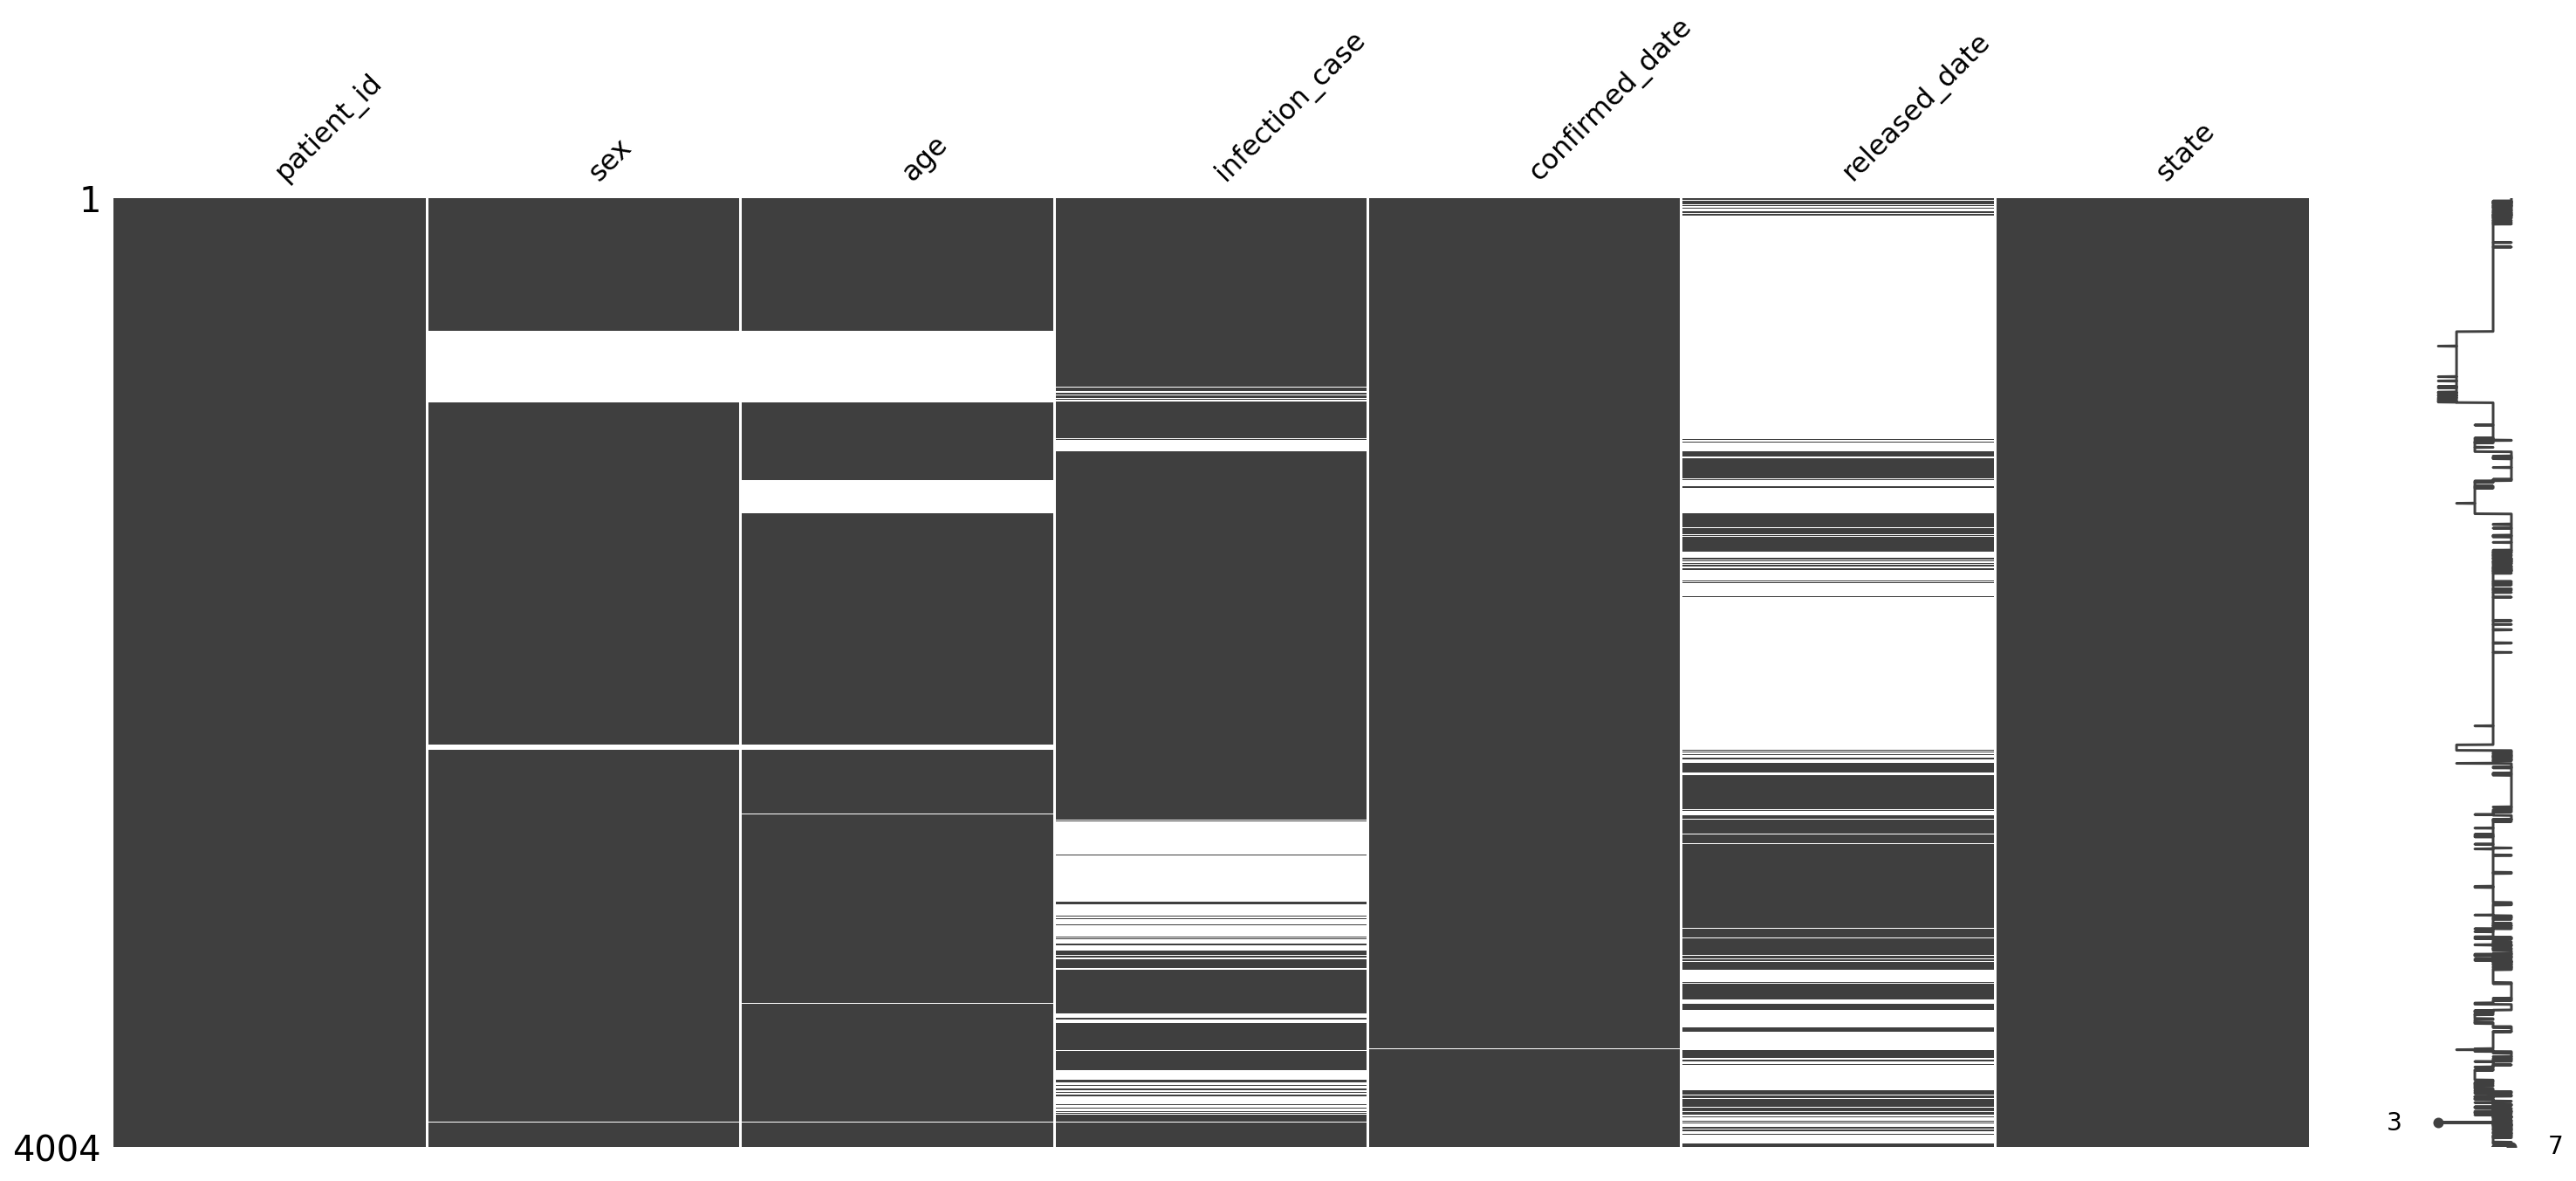

In [ ]:
msno.matrix(patient_info)
#공백 시각화

In [ ]:
patient_info.drop("released_date", axis=1, inplace=True)
#너무많은 공백을 가진 released_data 제거

In [ ]:
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]
patient_info = patient_info[patient_info["confirmed_date"].notnull()]
#공백을 가진 data제거

In [ ]:
(patient_info["age"] == "90s").sum()

26

In [ ]:
(patient_info["age"] == "110s").sum()
#몇세까지 감염자가 있는지 확인

0

In [ ]:
(patient_info["age"] == "100s").sum()

1

In [ ]:
patient_elder = patient_info[patient_info["age"].str.contains("60s|70s|80s|90s|100s")]
#노년층 데이터만 뽑아옴

In [ ]:
patient_elder_male = patient_elder[patient_elder["sex"] == "male"]
#노년층 남성만

In [ ]:
patient_elder_female = patient_elder[patient_elder["sex"] == "female"]
#노년층 여성만

In [ ]:
patient_elder_male

,patient_id,sex,age,infection_case,confirmed_date,state
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
16,1000000017,male,70s,contact with patient,2020-02-20,released
20,1000000021,male,80s,contact with patient,2020-02-20,released
...,...,...,...,...,...,...
3963,6100000096,male,60s,overseas inflow,2020-03-31,released
3965,6100000098,male,60s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [ ]:
patient_elder_male = patient_elder_male.sort_values(by="age")
#age 기준으로 정렬

In [ ]:
patient_elder_male

,patient_id,sex,age,infection_case,confirmed_date,state
3989,6100000122,male,60s,etc,2020-05-22,released
1981,2000000505,male,60s,overseas inflow,2020-04-01,isolated
1989,2000000513,male,60s,contact with patient,2020-04-01,isolated
3759,6020100104,male,60s,Cheongdo Daenam Hospital,2020-02-20,deceased
2001,2000000525,male,60s,contact with patient,2020-04-02,isolated
...,...,...,...,...,...,...
1184,1400000085,male,90s,contact with patient,2020-04-09,released
1855,2000000379,male,90s,contact with patient,2020-03-24,isolated
1908,2000000432,male,90s,contact with patient,2020-03-27,isolated
278,1000000279,male,90s,etc,2020-03-18,released


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


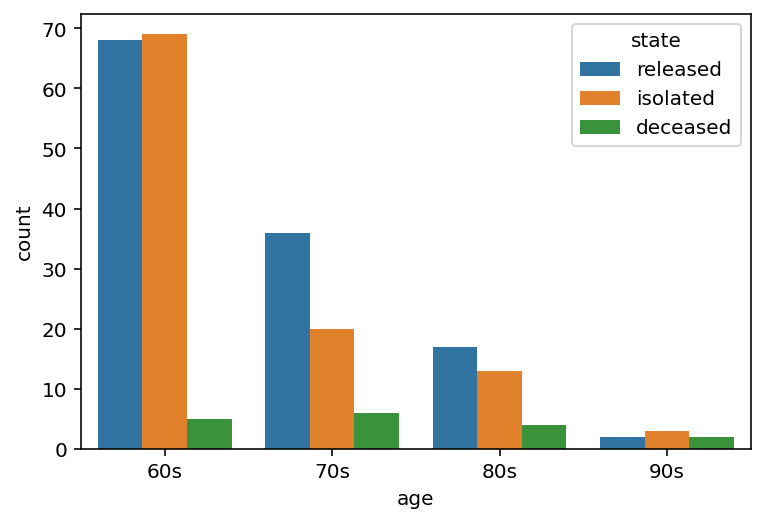

In [ ]:
sns.countplot(data=patient_elder_male, x="age", hue="state")

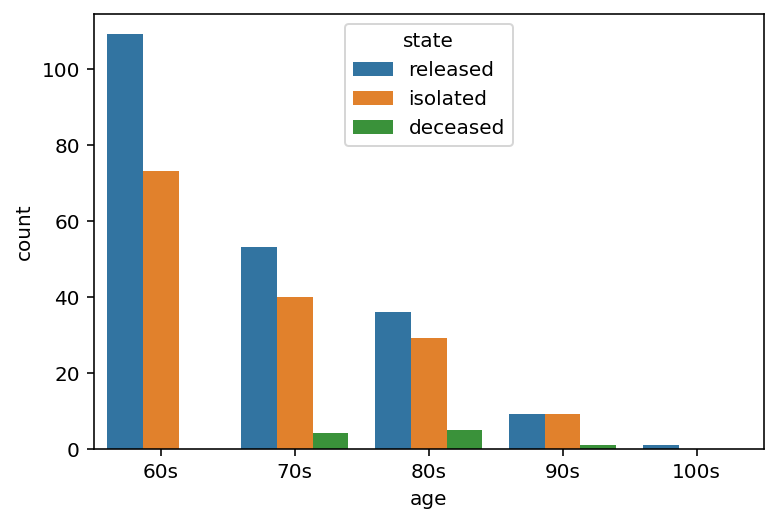

In [ ]:
sns.countplot(data=patient_elder_female, x="age", hue="state")
#연령대를 기준으로 여성 state에관한 그래프

In [ ]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000
811,2020-05-31,0,all age,11468,270,2.354377


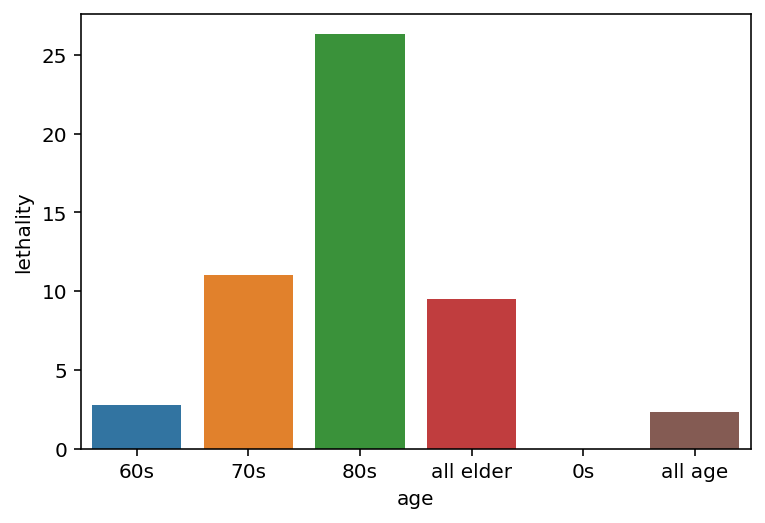

In [ ]:
sns.barplot(data=patient_timeage_all, x="age", y="lethality")
#노년층, 영유아층, 전연령층 치사율 데이터

<Figure size 1440x720 with 0 Axes>

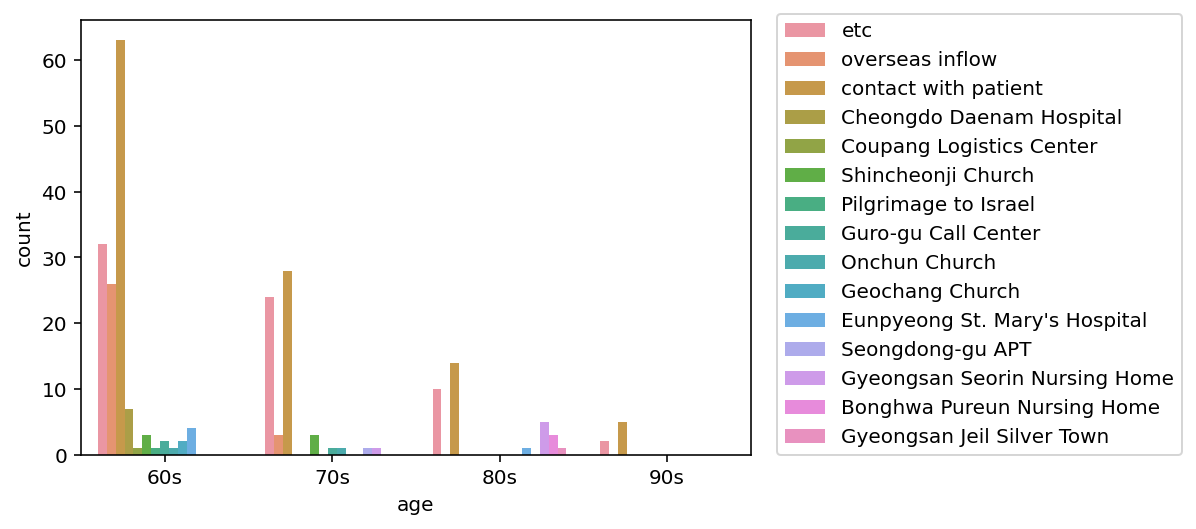

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.countplot(data=patient_elder_male, x="age", hue="infection_case")
plt.legend(loc=(1.04, 0))
plt.figure(figsize=(20, 10))
#60~80대 남성 감염방법에 관한 그래프

<Figure size 1440x720 with 0 Axes>

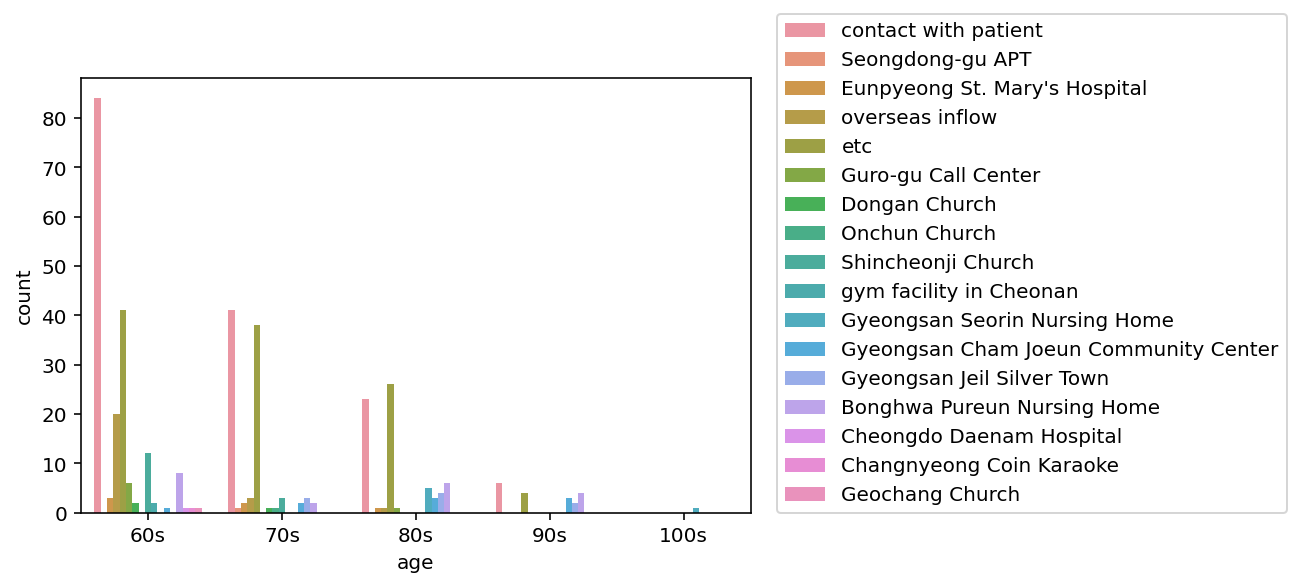

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.countplot(data=patient_elder_female, x="age", hue="infection_case")
plt.legend(loc=(1.04, 0))
plt.figure(figsize=(20,10))
#60~80대 여성 감염방법에 관한 그래프

In [ ]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
9,1000000010,female,60s,contact with patient,2020-02-05,released
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
13,1000000014,female,60s,contact with patient,2020-02-16,released
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
...,...,...,...,...,...,...
3967,6100000100,female,60s,etc,2020-03-31,released
3971,6100000104,female,70s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [ ]:
patient_elder = patient_elder.sort_values(by="age")

In [ ]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
3125,6001000503,female,100s,Gyeongsan Seorin Nursing Home,2020-03-10,released
9,1000000010,female,60s,contact with patient,2020-02-05,released
2402,4000000018,female,60s,contact with patient,2020-03-06,released
2380,3012000006,male,60s,contact with patient,2020-04-06,released
2377,3012000003,female,60s,contact with patient,2020-04-02,released
...,...,...,...,...,...,...
108,1000000109,male,90s,contact with patient,2020-03-07,deceased
2287,2000000811,female,90s,contact with patient,2020-05-28,isolated
3187,6001000565,male,90s,etc,2020-03-20,deceased
1881,2000000405,female,90s,contact with patient,2020-03-26,isolated


In [ ]:
patient_elder = patient_elder.reset_index(drop=True)

In [ ]:
patient_elder.loc[614] = patient_elder.loc[0]

In [ ]:
patient_elder.drop(0, inplace=True)
#맨위에 있는 100s를 밑으로 이동

In [ ]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
1,1000000010,female,60s,contact with patient,2020-02-05,released
2,4000000018,female,60s,contact with patient,2020-03-06,released
3,3012000006,male,60s,contact with patient,2020-04-06,released
4,3012000003,female,60s,contact with patient,2020-04-02,released
5,3013000005,male,60s,overseas inflow,2020-03-29,isolated
...,...,...,...,...,...,...
610,2000000811,female,90s,contact with patient,2020-05-28,isolated
611,6001000565,male,90s,etc,2020-03-20,deceased
612,2000000405,female,90s,contact with patient,2020-03-26,isolated
613,6008000006,female,90s,Bonghwa Pureun Nursing Home,2020-03-04,isolated


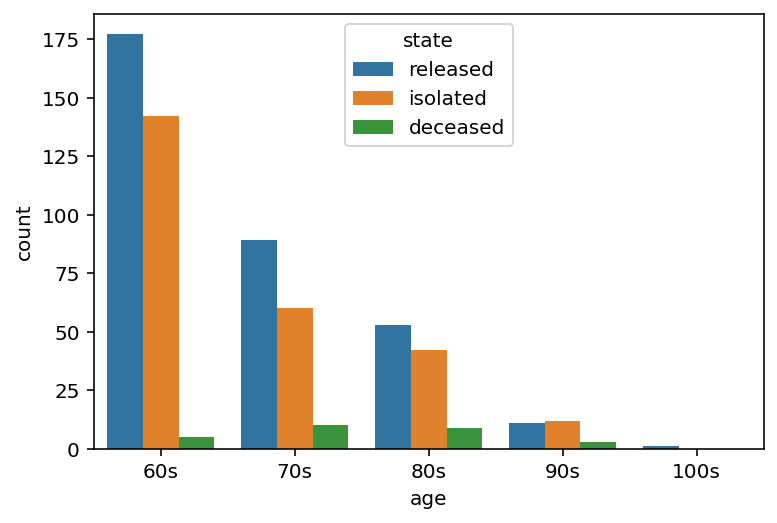

In [ ]:
sns.countplot(data=patient_elder, x="age", hue="state")